In [57]:
import numpy as np
import skimage.transform
import scipy
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage.morphology import medial_axis,watershed
dist_map = lambda img, mask=None: medial_axis(img,mask,return_distance = True)[1]
import os
from skimage.measure import block_reduce

%matplotlib inline

## Complex Object Analysis
### Distance Maps

In [2]:
xx,yy = np.meshgrid(range(100),range(100))

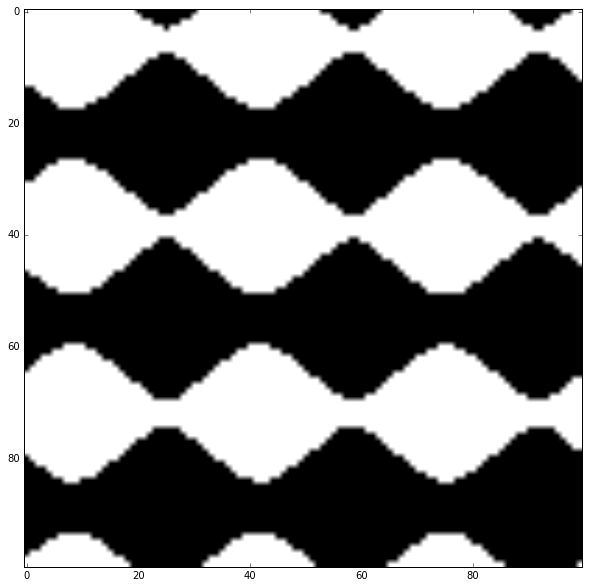

In [19]:
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize = (10,10))
img_test = np.sin(6*np.pi*xx/(100))+1.25*np.cos(6*np.pi*yy/(100)-1)
ax.imshow(img_test>0.15,cmap = 'gray')

In [50]:
img_bw = img_test>0.15
img_dist = dist_map(img_bw)
pdir = '06 -Analyzing Complex Objects/ext-figures'
out_dir = '{}/growing/'.format(pdir)
try:
    os.mkdir(out_dir)
except:
    print "Directory exists"
for i,nn_dist in enumerate(np.linspace(.5,img_dist.max(),20)):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
    ax1.imshow(img_bw,cmap = 'gray')
    ax1.set_title('Mask Image')
    dmap_im = ax2.imshow(img_bw+img_dist*(img_dist<nn_dist),vmax = img_dist.max())
    ax2.set_title('Distance Map\n(Iteration %i, Distance %02.2f)' %(i,nn_dist))
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    cbar = fig.colorbar(dmap_im,cax=cbar_ax)
    cbar_ax.set_title('Distance\n(px)')
    fig.savefig("%s/%05d.png" % (out_dir,i))
    fig.clear()
    plt.close()

Directory exists


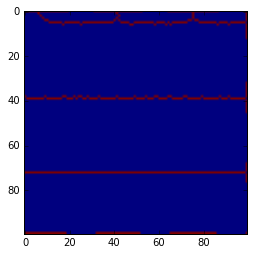

In [45]:
%matplotlib inline
plt.imshow(medial_axis(img_bw))

Directory exists


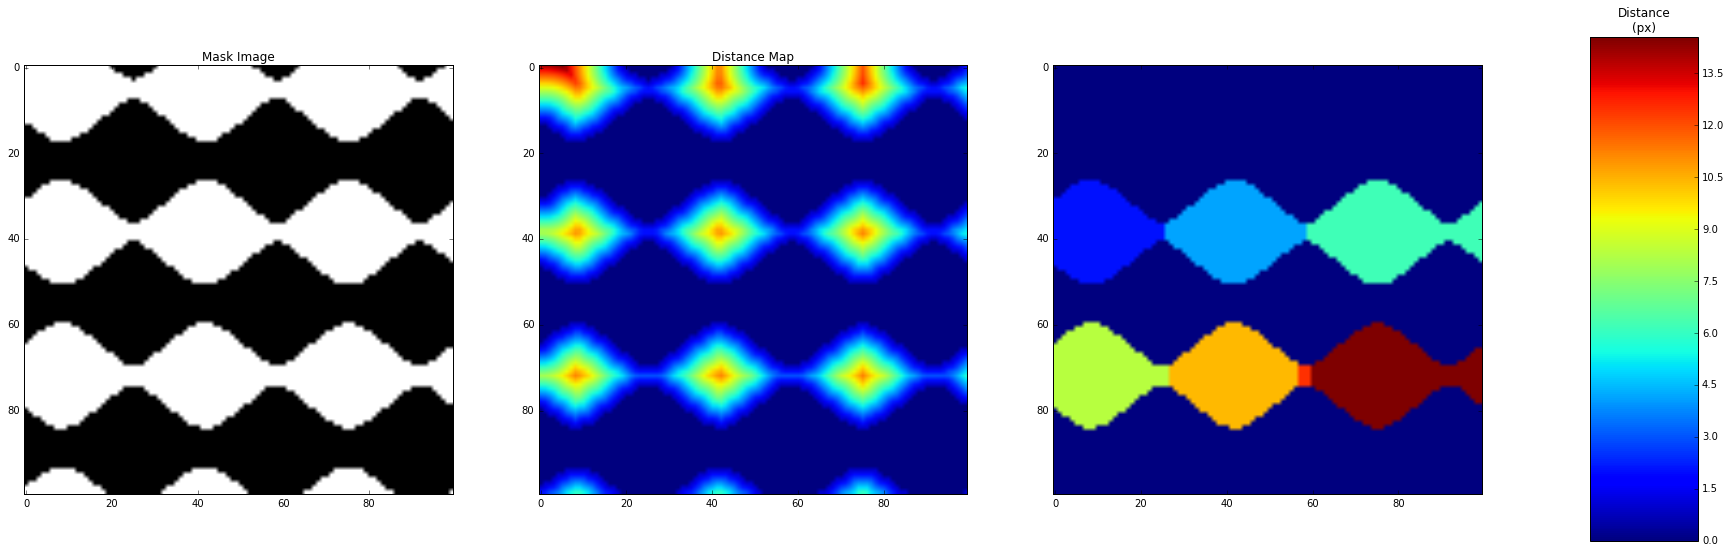

In [60]:
img_bw = img_test>0.15
img_dist = dist_map(img_bw)
pdir = '06 -Analyzing Complex Objects/ext-figures/'
try:
    os.mkdir(out_dir)
except:
    print "Directory exists"

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (30,10))
ax1.imshow(img_bw,cmap = 'gray')
ax1.set_title('Mask Image')
dmap_im = ax2.imshow(img_dist,vmax = img_dist.max())
ax2.set_title('Distance Map')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(dmap_im,cax=cbar_ax)
cbar_ax.set_title('Distance\n(px)')
from skimage.feature import peak_local_max
local_maxi = peak_local_max(img_dist, labels=img_bw,
                                footprint=np.ones((3, 3)),
                                indices=False)
markers = ndimage.label(local_maxi)[0]
ax3.imshow(watershed(-img_dist,markers,mask = img_bw))
fig.savefig("%s/DistanceMapToWatershed.png" % (pdir))
#fig.clear()
#plt.close()